# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import keras

### 1.1 Generating dataset

In [104]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [105]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [106]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [107]:
no_training_epochs = 5

### 1.3 Data examination

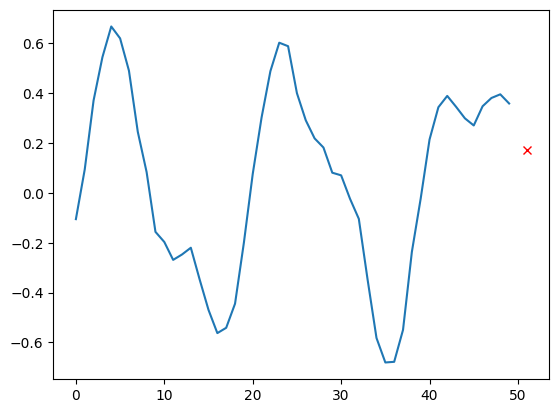

In [108]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [109]:
# Model definition
model_linear = keras.Sequential()
model_linear.add(keras.layers.Flatten(input_shape=(50,1)))
model_linear.add(keras.layers.Dense(1, activation = None))

In [110]:
# Model building

learning_rate = 0.001
optimizer = keras.optimizers.Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [111]:
model_linear.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [112]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2270 - mean_squared_error: 0.2270 - val_loss: 0.0688 - val_mean_squared_error: 0.0688
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.0345 - val_mean_squared_error: 0.0345
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0103 - val_mean_squared_error: 0.0103


In [113]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

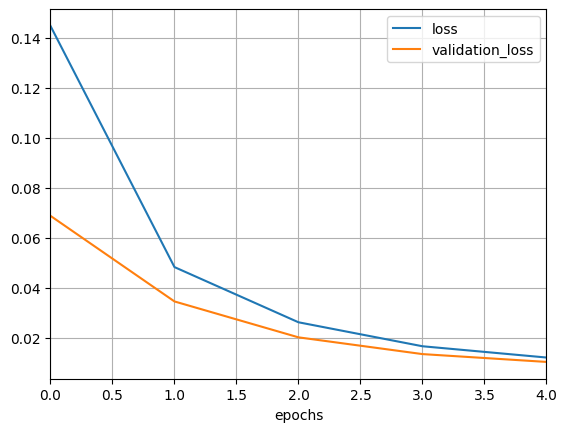

In [114]:
plot_function(history_linear)

In [115]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.010430365800857544
Test MSE:  0.010430365800857544


### 1.5 Simple RNN Model

In [116]:
model_simple_rnn = keras.Sequential()
model_simple_rnn.add(keras.layers.SimpleRNN(1, input_shape=[50, 1]))

In [117]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = keras.optimizers.Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [118]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.2888 - mean_squared_error: 0.2888 - val_loss: 0.1833 - val_mean_squared_error: 0.1833
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1498 - mean_squared_error: 0.1498 - val_loss: 0.0821 - val_mean_squared_error: 0.0821
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0538 - val_mean_squared_error: 0.0538
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0515 - mean_squared_error: 0.0515 - val_loss: 0.0458 - val_mean_squared_error: 0.0458
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0406 - val_mean_squared_error: 0.0406


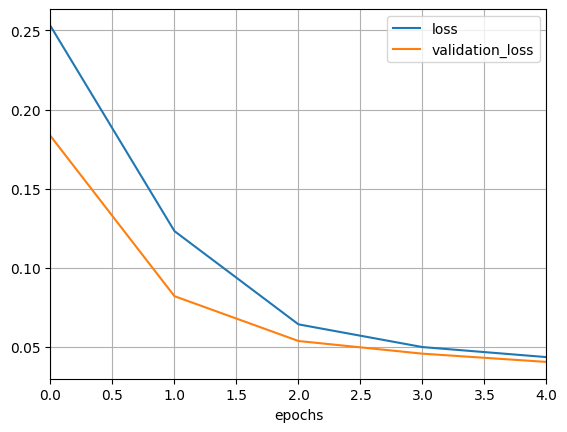

In [119]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [120]:
model_deep_rnn = keras.Sequential()
model_deep_rnn.add(keras.layers.SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(keras.layers.SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(keras.layers.SimpleRNN(1, input_shape=[50, 1]))

In [121]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = keras.optimizers.Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [122]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.0517 - mean_squared_error: 0.0517 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0031 - val_mean_squared_error: 0.0031
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0030 - val_mean_squared_error: 0.0030


In [123]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.003173595992848277
Test MSE:  0.003173595992848277


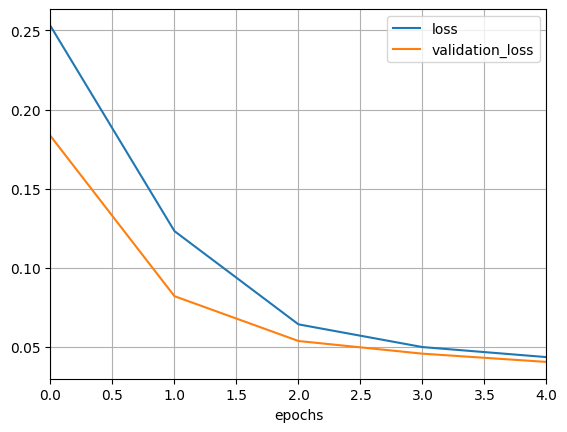

In [124]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

### 2.1 - Load dataset

In [173]:
size = 1000
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=1000)
print(X_train.shape+X_test.shape, y_train.shape)

(25000, 25000) (25000,)


### 2.2 - Dataset examination

In [174]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [175]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [157]:
print(single_sequence)

<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant


In [176]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [181]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size, input_shape=[None]),
    
    keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    keras.layers.Bidirectional(keras.layers.GRU(128, dropout=0.3, recurrent_dropout=0.3)),

    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    
    keras.layers.Dense(1, activation='sigmoid')
])



In [182]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)

In [183]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [184]:
history = model.fit(X_train, y_train, epochs= 5, validation_split= 0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 952s 2s/step - accuracy: 0.5891 - loss: 0.6812 - val_accuracy: 0.5080 - val_loss: 0.9186
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 870s 1s/step - accuracy: 0.6806 - loss: 0.5876 - val_accuracy: 0.7718 - val_loss: 0.4790
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 1734s 3s/step - accuracy: 0.8042 - loss: 0.4277 - val_accuracy: 0.8178 - val_loss: 0.3995
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 568s 908ms/step - accuracy: 0.8305 - loss: 0.3857 - val_accuracy: 0.8060 - val_loss: 0.4344
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 547s 875ms/step - accuracy: 0.8412 - loss: 0.3613 - val_accuracy: 0.8302 - val_loss: 0.3800


In [185]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.3656410872936249
Test accuracy:  83.54799747467041 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results